In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

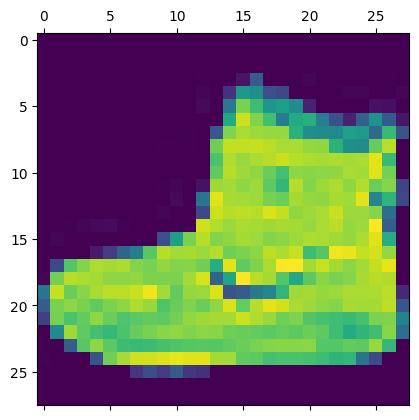

In [3]:
plt.matshow(x_train[0])

In [4]:
print(y_train[0])

9


In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
model = keras.Sequential()

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation = 'sigmoid'))
model.add(keras.layers.Dense(100, activation = 'sigmoid'))

# model.add(keras.layers.Dense(500, activation = 'relu'))
# model.add(keras.layers.Dense(500, activation = 'relu'))
# model.add(keras.layers.Dense(500, activation = 'rel'))
model.add(keras.layers.Dense(10, activation = 'sigmoid'))

In [9]:
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss='sparse_categorical_crossentropy')

In [10]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 937us/step - loss: 0.6037 - accuracy: 0.7957
Epoch 2/5
1875/1875 [==============================] - 2s 875us/step - loss: 0.3877 - accuracy: 0.8594
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3511 - accuracy: 0.8721
Epoch 4/5
1875/1875 [==============================] - 2s 971us/step - loss: 0.3266 - accuracy: 0.8806
Epoch 5/5
1875/1875 [==============================] - 2s 877us/step - loss: 0.3114 - accuracy: 0.8868


In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 617us/step - loss: 0.3439 - accuracy: 0.8756


[0.3439042866230011, 0.8755999803543091]

In [12]:
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 517us/step


In [13]:
y_predicted = [np.argmax(i) for i in y_pred]
cf = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted)
cf

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[853,   4,  10,  30,   3,   1,  87,   0,  12,   0],
       [  3, 969,   1,  20,   2,   0,   3,   0,   2,   0],
       [ 11,   1, 789,  17,  98,   1,  80,   0,   3,   0],
       [ 32,   9,   8, 898,  26,   1,  23,   0,   3,   0],
       [  0,   1,  99,  36, 790,   0,  71,   0,   3,   0],
       [  0,   0,   0,   1,   0, 946,   0,  42,   1,  10],
       [162,   1,  85,  32,  68,   0, 636,   0,  16,   0],
       [  0,   0,   0,   0,   0,  22,   0, 948,   0,  30],
       [  6,   1,   2,   6,   3,   3,   4,   4, 971,   0],
       [  0,   0,   0,   0,   0,  10,   1,  33,   0, 956]])>

Text(95.72222222222221, 0.5, 'Truth')

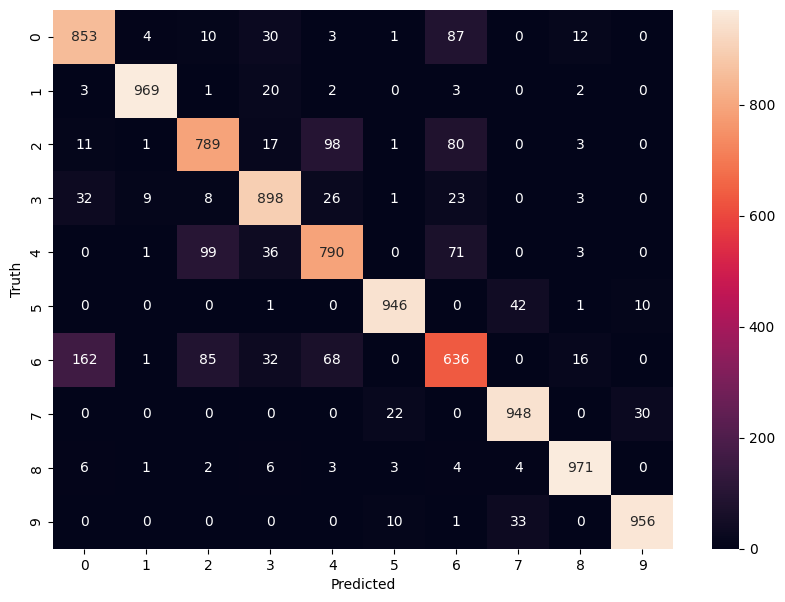

In [14]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cf,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
for i in range (10):
    print(np.argmax(y_pred[i]))

9
2
1
1
6
1
4
6
5
7


In [19]:
y_test[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)